# New York Times Application Programming Interface (API) Module
In this tutorial, we will be using Python to access the New York Times' Application Programming Interface (API) to retrieve data from their servers to use in our research. APIs are powerful tools that many websites use for data storage and access. It will not be long before online data is primarily retrieved via APIs, so it is important to know the basic structure and skills required to do so.

This module is adapted from tutorial from Northeastern Sociology Professor Laura Nelson, which in turn was adapted from [Chris Hensch](https://henchc.github.io/).

## Module Outline
Step One: Get an API Key<br>
Step Two: Documentation<br>
Step Three: Initialize API Variables and Import Useful Python Libraries.<br>
Step Four: Find the Appropriate Syntax for our search of Interest<br>
Step Five: Convert Data<br>
Step Six: Use our new Knowledge of the New York Times Data Structure to Retrieve Data.<br>
Step Seven: Visualization<br>
Step Eight: Saving our Data<br>

## Important Terminology
<b> Application Programming Interface (API):</b> Functions that allow for access to features or data of an operating system, applications, or online services. <br>
<b> Data Scraping:</b> The process of using an API to import or download data from a website into a local machine. <br>
<b> API Key:</b> APIs require an access key that behaves like a password to identify users who are accessing the data. <b> Do not</b> share your API key with anyone, nor make it accessible or visible in a public presentation or Jupyter Notebook. <br>


***

## Contact Information
Garrett Morrow <br>
Digital Teaching Integration Research Fellow <br>
PhD Student, Political Science <br>
morrow.g [at] husky [dot] neu [dot] edu
***

## Step One: Get an API Key
First, go to https://developer.nytimes.com/accounts/create to create a New York Times developer account that will grant you a key to use in this tutorial.

## Step Two: Documentation
APIs are similar, but they all function differently and require different syntax. You will need to find and reference the documentation for whatever API you would like to use. The New York Times documentation is available here: https://developer.nytimes.com/.

In this tutorial, we will be using the Article Search API, available here: https://developer.nytimes.com/docs/articlesearch-product/1/overview.

## Step Three: Initialize API Variables and Import Useful Python Libraries.
Step three is initialize our API variables to make our data search easier because we insert these variables into later code.

In [18]:
# The first variable is the API key we obtained in step one. This variable should be a string.
# Note that I have left this variable empty for you to insert your key between the "".

key = "Kmm8z8GUeXauZ9y53D86ycMmPcOtDpOD"

# The second variable we need is the base search URL. 
# Base URLs for APIs can be found in the documentation.
base_url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'


# Next we will import the libraries we will need for data analysis and API scraping.
import requests # Enables the 'get' requests we use request data from the API server.\
import json # JSONs are the data structure APIs usually return. JSONs are similar to dictionaries.
import pandas # Pandas are spreadsheet-like data structures.
import time # This function introduces a pause between pings to server, so you do not overload a server and possibly get banned or crash the server.
import matplotlib.pyplot as plt # Matplotlib (specifically pyplot) is our library for visualization.

## Step Four: Find the Appropriate Syntax for our Search of Interest
This is a difficult step of using APIs, as each API uses a different syntax and organizes their data in different ways. You may have to use the URL extension that allows for broad searches or lookups in order to find identifying data (in the case of the New York Times, we want to find the proper syntax for searching for specific article types). Then once you have identifying data, you can use the other syntax extensions for more in-depth searches of the specific data.

Syntax can be found in the documentation, and for the New York Times, looks like this:

/articlesearch.json?q={query}&fq={filter}

So with the base_url, an example API call will look roughly like this:

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=yourkey

We can then use the different filter query fields to change our search parameters.

In [2]:
# Let's now try to create some search parameters and perform a search.
# We will do a search for articles that mention the Occupy Wall Street movement.

search_params = {'q': '"Occupy Wall Street"',
                "api-key": key}

In [3]:
# Next we will use the requests library to 'get' data from the New York Times API server.

r = requests.get(base_url, params=search_params)

In [4]:
# We can now see what our response URL looks like.
# We can also go to the URL, but it is mostly not useable.
r.url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=%22Occupy+Wall+Street%22&api-key=Kmm8z8GUeXauZ9y53D86ycMmPcOtDpOD'

## Step Five: Convert Data
Next we need to convert the data we received to the JSON format and dig into it to see what data we have retrieved.

In [5]:
# First we can convert the data into text, but this too is mostly unusable .
response_text = r.text
response_text[:1000]

'{"status":"OK","copyright":"Copyright (c) 2019 The New York Times Company. All Rights Reserved.","response":{"docs":[{"web_url":"https://www.nytimes.com/2017/07/12/world/middleeast/occupy-protester-robert-grodt-dies-in-syria.html","snippet":"Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.","lead_paragraph":"Robert Grodt was a volunteer medic at the Occupy Wall Street protests in 2011, when he pulled Kaylee Dedrick, who had just been pepper-sprayed in the face, out of the crowd to treat her.","abstract":"Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.","print_page":"4","blog":{},"source":"The New York Times","multimedia":[{"rank":0,"subtype":"thumbnail","caption":null,"credit":null,"type":"image","url":"images/2017/07/13/world/middleeast/ypg4-still/ypg4-still-thumbS

In [6]:
# Instead, we can convert the text into JSON, which are essentially big dictionaries.
data = json.loads(response_text)
data

{'status': 'OK',
 'copyright': 'Copyright (c) 2019 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'web_url': 'https://www.nytimes.com/2017/07/12/world/middleeast/occupy-protester-robert-grodt-dies-in-syria.html',
    'snippet': 'Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.',
    'lead_paragraph': 'Robert Grodt was a volunteer medic at the Occupy Wall Street protests in 2011, when he pulled Kaylee Dedrick, who had just been pepper-sprayed in the face, out of the crowd to treat her.',
    'abstract': 'Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.',
    'print_page': '4',
    'blog': {},
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'thumbnail',
      'caption': None,
      'credit': None,
      'ty

In [7]:
# The next steps are tedious as we will need to repeatedly dig into our data by finding out what
# our dictionary keys are, and what values they contain.

data.keys()

dict_keys(['status', 'copyright', 'response'])

In [8]:
# As we can see, the 'copyright' key has just the value of a string.

data['copyright']

'Copyright (c) 2019 The New York Times Company. All Rights Reserved.'

In [9]:
# However, as we can see, the 'response' key now looks like another dictionary.

data['response']

{'docs': [{'web_url': 'https://www.nytimes.com/2017/07/12/world/middleeast/occupy-protester-robert-grodt-dies-in-syria.html',
   'snippet': 'Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.',
   'lead_paragraph': 'Robert Grodt was a volunteer medic at the Occupy Wall Street protests in 2011, when he pulled Kaylee Dedrick, who had just been pepper-sprayed in the face, out of the crowd to treat her.',
   'abstract': 'Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.',
   'print_page': '4',
   'blog': {},
   'source': 'The New York Times',
   'multimedia': [{'rank': 0,
     'subtype': 'thumbnail',
     'caption': None,
     'credit': None,
     'type': 'image',
     'url': 'images/2017/07/13/world/middleeast/ypg4-still/ypg4-still-thumbStandard.jpg',
     'height': 75,
   

In [10]:
# Now we can see what keys the 'response' dictionary has.

data['response'].keys()

dict_keys(['docs', 'meta'])

In [11]:
# Let's see what the 'meta' key is - this will be metadata about our search.

data['response']['meta']

# Wow, over 2000 hits!

{'hits': 2078, 'offset': 0, 'time': 49}

In [12]:
# If we dig even further into the 'docs' key we can see that we now have yet another dictionary.

data['response']['docs']

[{'web_url': 'https://www.nytimes.com/2017/07/12/world/middleeast/occupy-protester-robert-grodt-dies-in-syria.html',
  'snippet': 'Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.',
  'lead_paragraph': 'Robert Grodt was a volunteer medic at the Occupy Wall Street protests in 2011, when he pulled Kaylee Dedrick, who had just been pepper-sprayed in the face, out of the crowd to treat her.',
  'abstract': 'Robert Grodt was an activist at the Occupy Wall Street protests in 2011. Five years later, he traveled to Syria, where he died after joining a Kurdish militia.',
  'print_page': '4',
  'blog': {},
  'source': 'The New York Times',
  'multimedia': [{'rank': 0,
    'subtype': 'thumbnail',
    'caption': None,
    'credit': None,
    'type': 'image',
    'url': 'images/2017/07/13/world/middleeast/ypg4-still/ypg4-still-thumbStandard.jpg',
    'height': 75,
    'width': 75,
    'leg

In [13]:
# Now we can see that we have a list.

type(data['response']['docs'])

list

In [14]:
# We can also see that although we have 16,000 hits, we only really got 10 hits back due to the
# way the New York Times organizes their data into pages of 10 hits each.

len(data['response']['docs'])

10

In [15]:
# Let's see what type of data we are working with now.

type(data['response']['docs'][0])

# We can see we have a list of dictionaries!

dict

In [16]:
# We can also see what the new keys are in one of our 10 documents since we can see we have a 
# list of dictionaries.

data['response']['docs'][0].keys()

dict_keys(['web_url', 'snippet', 'lead_paragraph', 'abstract', 'print_page', 'blog', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'subsection_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

In [17]:
# Since we have a dictionary, we can convert it into a Pandas dataframe 
# and visualize the data a little better.

df_all = pandas.DataFrame(data['response']['docs'])
df_all

,_id,abstract,blog,byline,document_type,headline,keywords,lead_paragraph,multimedia,news_desk,print_page,pub_date,section_name,snippet,source,subsection_name,type_of_material,uri,web_url,word_count
0,nyt://article/8f969ac5-b403-58bd-a501-f3655973...,Robert Grodt was an activist at the Occupy Wal...,{},"{'original': 'By Megan Specia', 'person': [{'f...",article,"{'main': 'First, a Symbol of Occupy Wall Stree...","[{'name': 'subject', 'value': 'vis-multimedia'...",Robert Grodt was a volunteer medic at the Occu...,"[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Foreign,4,2017-07-12T21:32:16+0000,World,Robert Grodt was an activist at the Occupy Wal...,The New York Times,Middle East,News,nyt://article/8f969ac5-b403-58bd-a501-f3655973...,https://www.nytimes.com/2017/07/12/world/middl...,743
1,nyt://interactive/b256cf89-a17a-58fd-ae2b-447e...,Though some protesters have returned to their ...,{},"{'original': 'By ACCRA SHEPP', 'person': [{'fi...",multimedia,{'main': 'Occupy Wall Street: Where Are They N...,"[{'name': 'organizations', 'value': 'Occupy Wa...",Though some protesters have returned to their ...,"[{'rank': 0, 'subtype': 'hpLarge', 'caption': ...",Opinion,NaN,2016-09-17T19:16:44+0000,Opinion,Though some protesters have returned to their ...,The New York Times,NaN,Interactive Feature,nyt://interactive/b256cf89-a17a-58fd-ae2b-447e...,https://www.nytimes.com/interactive/2016/09/17...,0
2,nyt://article/16b3a952-6f70-518a-a084-c538227c...,"A performance by Peter Yarrow, of Peter, Paul ...",{},"{'original': 'By Rick Rojas', 'person': [{'fir...",article,{'main': 'A #MeToo Episode From 1969 Casts a L...,"[{'name': 'persons', 'value': 'Yarrow, Peter',...","Over the past five decades, Peter Yarrow, the ...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Metro,19,2019-07-04T20:09:53+0000,New York,"A performance by Peter Yarrow, of Peter, Paul ...",The New York Times,NaN,News,nyt://article/16b3a952-6f70-518a-a084-c538227c...,https://www.nytimes.com/2019/07/04/nyregion/pe...,687
3,nyt://article/6aaeb396-47ac-5111-af86-d82a0ac7...,It’s not just about tuition. It’s a way to rea...,{},"{'original': 'By E. Tammy Kim', 'person': [{'f...",article,"{'main': 'What Free College Really Means', 'ki...","[{'name': 'subject', 'value': 'Colleges and Un...","Until a few years ago, I taught an undergradua...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",OpEd,23,2019-06-30T23:00:05+0000,Opinion,It’s not just about tuition. It’s a way to rea...,The New York Times,NaN,Op-Ed,nyt://article/6aaeb396-47ac-5111-af86-d82a0ac7...,https://www.nytimes.com/2019/06/30/opinion/war...,755
4,nyt://article/ebf4dafe-4d75-5dea-bda4-e83449ae...,"Astead W. Herndon, a politics reporter, answer...",{},"{'original': 'By Jake Lucas', 'person': [{'fir...",article,{'main': 'Notes From Three Months With Young C...,"[{'name': 'organizations', 'value': 'Sunrise M...",Times Insider explains who we are and what we ...,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Summary,2,2019-08-08T09:00:07+0000,Reader Center,"Astead W. Herndon, a politics reporter, answer...",The New York Times,NaN,News,nyt://article/ebf4dafe-4d75-5dea-bda4-e83449ae...,https://www.nytimes.com/2019/08/08/reader-cent...,1031
5,nyt://article/6f109fcd-db22-552a-98de-028498e7...,Mia Habib’s work uses walking and running — an...,{},"{'original': 'By Gia Kourlas', 'person': [{'fi...",article,{'main': 'A Protest Dance of Everyday Moves an...,"[{'name': 'subject', 'value': 'Dancing', 'rank...",Walk with a loose neck. Take steps without mak...,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Culture,2,2019-05-01T18:36:59+0000,Arts,Mia Habib’s work uses walking and running — an...,The New York Times,NaN,News,nyt://article/6f109fcd-db22-552a-98de-028498e7...,https://www.nytimes.com/2019/05/01/arts/mia-ha...,882
6,nyt://article/d8b34385-ab28-5749-b0e8-a8dbf35a...,But first they bought bad debts and exploded a...,{},"{'original': 'By Josie Thaddeus-Johns', 'perso...",article,{'main': 'These Artists Want t

## Step Six: Use our new Knowledge of the New York Times' Data Structure to Retrieve Data.

We will now use our knowledge of the data structure to count the number of articles per year that mention the late Supreme Court Justice Antonin Scalia. We will do this by using variables for the dates along with a for loop to loop through the API with a narrow yearly search. We will also use the timer library to limit our API search hits so we do not overwhelm the New York Times server.



In [21]:
# Will first create a new empty dictionary to hold our returned values.

hits = {}

# Next we create date start and end roots to frame our search within one year at a time.
# Note that the New York Times syntax from the documentation is: YYYYMMDD.

startroot = '0101'
endroot = '1231'

# Now we have our for loop that goes through a range of dates: from 2011 to 2019.

for date in range(2011, 2019):
    # These variables are our dates - we convert the year to a string and add our date roots.
    startdate = str(date) + startroot
    enddate = str(date) + endroot
    # This print command will help us track our progress by printing the current year we
    # are searching in the API.
    print(startdate)
    # Next we have search parameters as we saw above, but the dates will change during the loops.
    search_params = {'q': '"Antonin Scalia"',
                    "api-key": key,
                    "begin_date": startdate,
                    "end_date": enddate}
    # Below is the same 'get' function we saw above.
    r = requests.get(base_url, params=search_params)
    # Conversion to text
    response_text = r.text
    # conversion to JSON
    data = json.loads(response_text)
    # A status update as our loop goes through its iterations.
    print(data['status'])
    # The count from our metadata
    num_hits = data['response']['meta']['hits']
    # The assignment of date to hits in our empty dictionary above
    hits[date] = num_hits
    # This function is a pause timer of 5 seconds between loops to keep us from overloading the API
    time.sleep(5)
hits

20110101
OK
20120101
OK
20130101
OK
20140101
OK
20150101
OK
20160101
OK
20170101
OK
20180101
OK


{2011: 178,
 2012: 174,
 2013: 174,
 2014: 168,
 2015: 189,
 2016: 477,
 2017: 179,
 2018: 505}

## Step Eight: Visualization
This section will be a brief example of a simple visualization of our data using the matplotlib pyplot function.

In [34]:
# First we will convert our hits dictionary to a pandas dataframe

hits_df = pandas.Series(hits).to_frame('Hits')
hits_df

,Hits
2011,178
2012,174
2013,174
2014,168
2015,189
2016,477
2017,179
2018,505


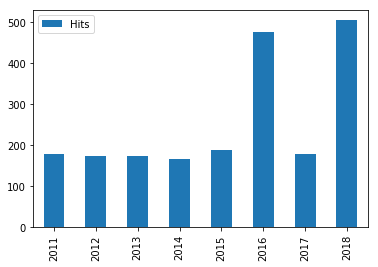

In [39]:
# This simple function will visualize our hits data as a bar graph.

hits_df.plot(kind='bar')

## Step Nine: Saving our Data
The final step will be to save our data. Since we have our data in a pandas dataframe, we can export this as a .csv file.

In [41]:
# This final function will write a new .json file with our data.
# Be cautious when writing files as it is very easy to overwrite any files, including
# systems-critical files if you are not careful.

with open('Antonin_Scalie_NYTimes_Hits.json', 'w') as outfile:
    json.dump(hits, outfile)